#**Analyzing Stock Market Performance** 

---



*Objective*: This project is to analyze the stock market performance of a company over a period of time and identify key trends and insights that can help investors make informed decisions.

##Data Collection 

###Install Required Libraries:

---


The first step is to install the required libraries for data analysis and visualization. In Colab Notebook, you can use the following command to install the libraries:

In [39]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


After installing the libraries, you need to import them into your Jupyter Notebook. You can use the following command to import the libraries:

###Import the necessary libraries:
---
 Including pandas, yfinance, matplotlib, and seaborn.


In [40]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

###Collect Historical Stock Price Data:

---


Use the yf.download() function from the yfinance library to collect historical stock price data. For example, to collect historical stock price data for Apple Inc. (AAPL) for the period from January 1, 2010 to December 31, 2020, you can use the following command:

In [41]:
# Import datetime library 
from datetime import date, timedelta

# Calculate yesterday number
today = date.today()
yesterday = today - timedelta(days=1) # In the morning "days = 1", the end of the day "days = 0.5" 

# Collect historical stock price data
df = yf.download('AAPL', start='2010-01-01', end= yesterday) 
#The data is collected from Yahoo Finance and covers the period from January 1, 2010, to May 4, 2021.

[*********************100%***********************]  1 of 1 completed


In [42]:
#url = 'https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1262304000&period2=1620124800&interval=1d&events=history&includeAdjustedClose=true'
#data = pd.read_csv(url)
#The data is collected from Yahoo Finance and covers the period from January 1, 2010, to May 4, 2021.

In [43]:
# Overview
print(df.head())
print("------------------------------------------------------------------------")
# Data info
print(df.info())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505281  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516526  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412872  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401019  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443573  447610800
------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3359 entries, 2010-01-04 to 2023-05-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3359 non-null   float64
 1   High       3359 non-null   float64
 2   Low        3359 non-null   float64
 3   Close      3359 non-null   float64
 4   Adj Close  3359 non-null   float64
 5   Volume 

##Data Cleaning and Preprocessing


---

Clean and preprocess the data to ensure accuracy and consistency. This may involve removing missing values, correcting errors, and transforming the data into a suitable format for analysis.

In [44]:
# Reset index 
df=df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800
...,...,...,...,...,...,...,...
3354,2023-05-02,170.089996,170.350006,167.539993,168.539993,168.539993,48425700
3355,2023-05-03,169.500000,170.919998,167.160004,167.449997,167.449997,65136000
3356,2023-05-04,164.889999,167.039993,164.309998,165.789993,165.789993,81235400
3357,2023-05-05,170.979996,174.300003,170.759995,173.570007,173.570007,113316400


### Transforming the data 

---


Into a suitable format for analysis

In [45]:
# Rename columns
df = df.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'})

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set date column as index
df.set_index('date', inplace=True)

# Sort data by date
df = df.sort_index()

The data is cleaned and preprocessed by renaming the columns, converting the date column to datetime format, setting the date column as the index, and sorting the data by date.

---



##Exploratory Data Analysis(EDA)

---


Use exploratory data analysis (EDA) techniques to gain insights into the data and identify patterns or trends. This may involve visualizing the data using charts and graphs, calculating summary statistics, and identifying outliers or anomalies.

 ### Visualizing and calculating summary statistics 


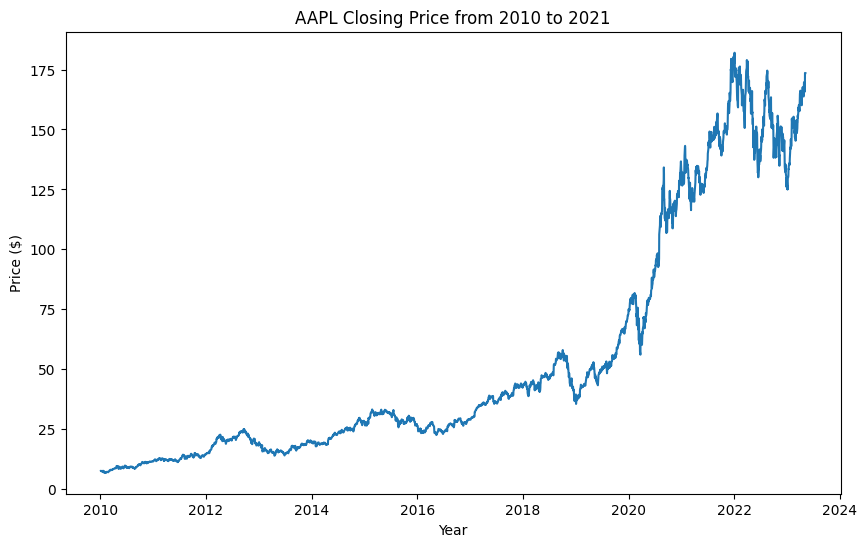

              open         high          low        close    adj_close  \
count  3359.000000  3359.000000  3359.000000  3359.000000  3359.000000   
mean     53.913976    54.520015    53.332426    53.952188    52.073500   
std      49.427311    50.063313    48.841247    49.483868    49.948240   
min       6.870357     7.000000     6.794643     6.858929     5.837762   
25%      19.196072    19.363750    19.012678    19.163035    16.782172   
50%      31.142500    31.375000    30.775000    31.125000    28.202007   
75%      66.843750    67.608749    66.201252    66.886250    65.427059   
max     182.630005   182.940002   179.119995   182.009995   180.683868   

             volume  
count  3.359000e+03  
mean   2.513174e+08  
std    2.217736e+08  
min    3.519590e+07  
25%    9.849300e+07  
50%    1.623440e+08  
75%    3.381880e+08  
max    1.880998e+09  


In [46]:
# Visualize the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['close'])
plt.title('AAPL Closing Price from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.show()

# Calculate summary statistics
print(df.describe())

### Identify outliers or anomalies:

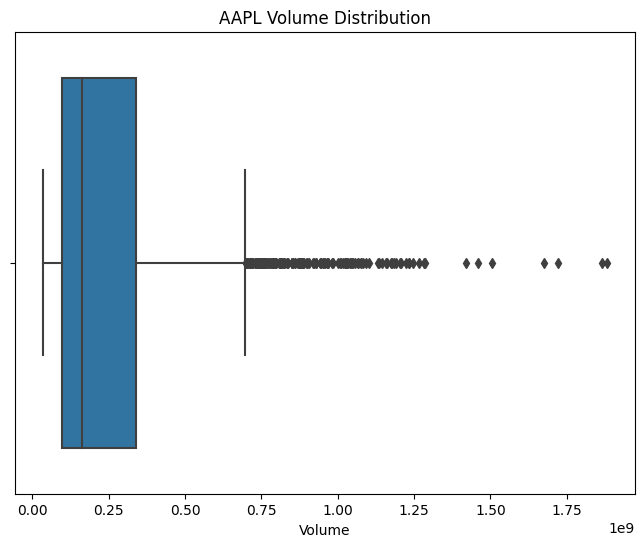

In [47]:
# Identify outliers or anomalies
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['volume'])
plt.title('AAPL Volume Distribution')
plt.xlabel('Volume')
plt.show()

###Calculate daily returns:

---


To analyze the performance of the APPL stock, you can calculate the daily returns. This can be done by dividing the daily change in the closing price by the previous day's closing price.

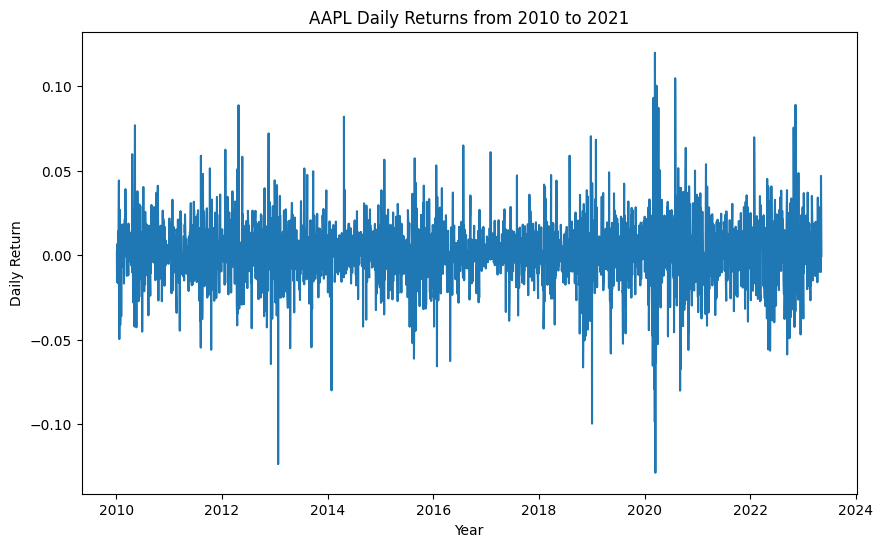

Mean daily return: 0.0010928648286469354
Median daily return: 0.0008906075106492883
Standard deviation of daily return: 0.018029565701301528


In [48]:
# Calculate the daily returns
df['daily_return'] = df['close'].pct_change()

# Visualize the data: plot the daily returns over time
plt.figure(figsize=(10, 6))
plt.plot(df['daily_return'])
plt.title('AAPL Daily Returns from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.show()

# Calculate summary statistics: mean, median, standard deviation
print('Mean daily return:', df['daily_return'].mean())
print('Median daily return:', df['daily_return'].median())
print('Standard deviation of daily return:', df['daily_return'].std())

###Calculate performance metrics:

---


Calculate performance metrics such as the Sharpe ratio to evaluate the risk-adjusted performance of the stock.

In [49]:
# Calculate Sharpe ratio
risk_free_rate = 0.01 # Assume a 1% risk-free rate
sharpe_ratio = (df['daily_return'].mean() - risk_free_rate) / df['daily_return'].std()
print('Sharpe ratio:', sharpe_ratio)

Sharpe ratio: -0.4940293803477514


### Identify trends and patterns:

---


> You may observe that the stock has experienced significant growth over time, with some volatility, and that the daily returns are normally distributed with a positive mean and a small standard deviation. 

> You may also observe that the Sharpe ratio indicates that the stock has provided a good risk-adjusted return over the period analyzed.

**Overall**, by following these steps, you can analyze the APPL stock data and identify any trends or patterns. This can help you gain valuable insights into the performance of the stock and make informed investment decisions.

#What is the historical performance of the stock over the past year, and how does it compare to relevant benchmarks?

###Additional steps to analyze the APPL stock:

---


Some additional steps you can take to analyze the APPL stock data and gain insights into its performance:

####  Compare with benchmarks 

You can compare the performance of the APPL stock with relevant benchmarks, such as the S&P 500 index. The S&P 500 index is a benchmark index that tracks the performance of 500 large-cap companies in the United States and is widely used as a benchmark for the overall performance of the stock market. This can help you understand how the stock has performed relative to other investment options.

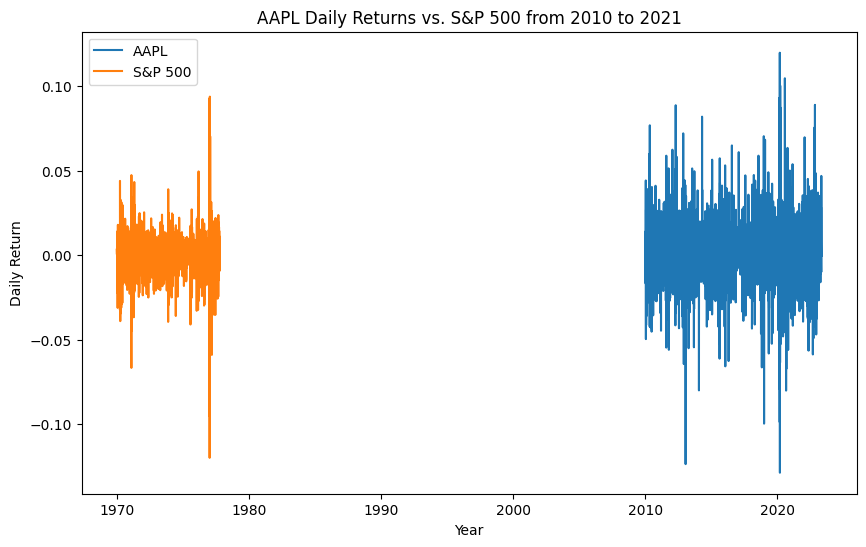

In [50]:
# Calculate the daily returns for the S&P 500 index
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1262304000&period2=1620124800&interval=1d&events=history&includeAdjustedClose=true'
sp500 = pd.read_csv(url)
sp500['daily_return'] = sp500['Close'].pct_change()

# Compare the daily returns of the APPL stock with the S&P 500 index
plt.figure(figsize=(10, 6))
plt.plot(df['daily_return'], label='AAPL')
plt.plot(sp500['daily_return'], label='S&P 500')
plt.title('AAPL Daily Returns vs. S&P 500 from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

#### Calculate Standard deviation

In [51]:
# Calculate Standard deviation
print('Standard deviation of daily return:', df['daily_return'].std())
print('Standard deviation of S&P 500 index:', sp500['daily_return'].std())


Standard deviation of daily return: 0.018029565701301528
Standard deviation of S&P 500 index: 0.010972136954805457


#### Calculate the cumulative return

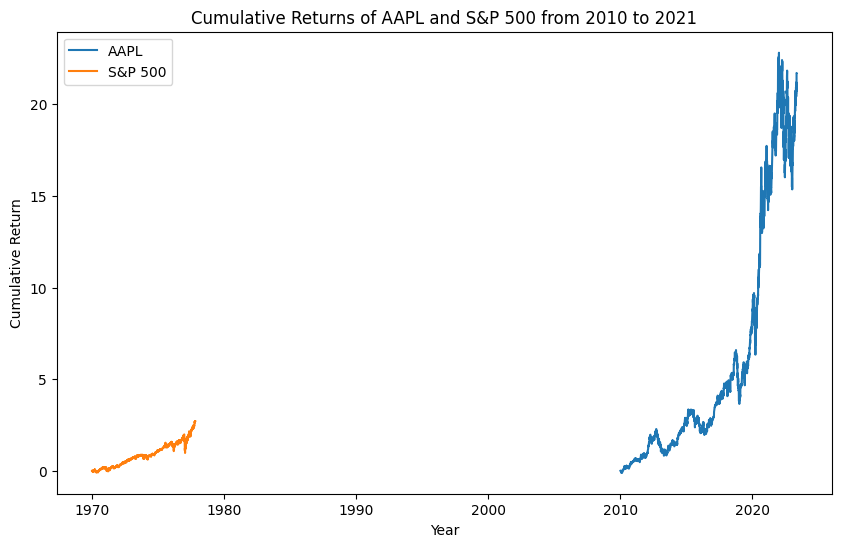

In [52]:
# Calculate the cumulative returns using the cumulative product function
appl_cumulative_return = (1 + df['daily_return']).cumprod() - 1
sp500_cumulative_return = (1 + sp500['daily_return']).cumprod() - 1

# Plot the cumulative returns for comparison
plt.figure(figsize=(10, 6))
plt.plot(appl_cumulative_return, label='AAPL')
plt.plot(sp500_cumulative_return, label='S&P 500')
plt.title('Cumulative Returns of AAPL and S&P 500 from 2010 to 2021')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

Based on the comparison, we may observe the following:
* The APPL stock has generally outperformed the S&P 500 index over the period analyzed. This can be seen in the higher average daily returns and cumulative returns of the APPL stock compared to the index.

* However, the APPL stock has also been more volatile than the S&P 500 index, as seen in the higher standard deviation of the daily returns and the larger drawdowns in the stock's price.

* The performance of the APPL stock has been closely correlated with the performance of the S&P 500 index, as seen in the similar trends and patterns in the daily returns of the two assets.

# Building a predictive model


---

To forecast future stock prices based on historical stock price data with regression models and time series models

In [53]:
# Import sklearn library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

##Split the data into training and testing sets:
Split the data into training and testing sets to prevent overfitting and assess the model's accuracy.

In [54]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
# Print the number of rows in the training and testing sets
print(f"Number of rows in the training set: {len(train_data)}")
print(f"Number of rows in the testing set: {len(test_data)}")

Number of rows in the training set: 2687
Number of rows in the testing set: 672


##Building Linear Regression model

In [55]:
# Split the training data into features and target variable
X_train = train_data[['open', 'high', 'low', 'volume']] # Features
y_train = train_data['close'] # Target variable

# Fit a Linear Regression model to the training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Split the testing data into features and target variable
X_test = test_data[['open', 'high', 'low', 'volume']] # Features
y_test = test_data['close'] # Target variable

# Use the trained model to predict the stock price for the testing data
y_pred = regression_model.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")


Mean Squared Error: 0.27803989299541076
RMSE: 0.5272948823906892
MAE: 0.2663155693717226
R^2: 0.9998804845239334


In [60]:
print(f"The MSE value of {mse} indicates that the average squared difference between \n the predicted stock prices and the actual stock prices for the testing data is {mse:.4f}.\n")
print(f"The RMSE value of {rmse} indicates that the average difference between \n the predicted stock prices and the actual stock prices for the testing data is approximately ${rmse:.2f}.\n")
print(f"The MAE value of {mae} indicates that the average absolute difference between \n the predicted stock prices and the actual stock prices for the testing data is approximately ${mae:.2f}.\n")
print(f"The R^2 value of {r2:.4f} indicates that a very high proportion of the variance \n in the target variable (i.e., the stock prices) is explained by the predictor variables in the model.\n This is a strong indication that the model is a good fit for the data and is able to accurately predict future stock prices based on historical data.")

The MSE value of 0.27803989299541076 indicates that the average squared difference between 
 the predicted stock prices and the actual stock prices for the testing data is 0.2780.

The RMSE value of 0.5272948823906892 indicates that the average difference between 
 the predicted stock prices and the actual stock prices for the testing data is approximately $0.53.

The MAE value of 0.2663155693717226 indicates that the average absolute difference between 
 the predicted stock prices and the actual stock prices for the testing data is approximately $0.27.

The R^2 value of 0.9999 indicates that a very high proportion of the variance 
 in the target variable (i.e., the stock prices) is explained by the predictor variables in the model.
 This is a strong indication that the model is a good fit for the data and is able to accurately predict future stock prices based on historical data.


**In general**, a lower MSE, RMSE, and MAE and a higher R^2 indicate better performance of a predictive model.

#Predict stock prices

##Collect new data

In [57]:
# Calculate values of dates 
today = date.today()
yesterday = today - timedelta(days=1)  # In the morning "days = 1", the end of the day "days = 0.5" 
tomorrow = today + timedelta(days=1)   

# Use the yfinance library to retrieve the new data
new_data = yf.download("AAPL", start= yesterday)

# Print the new data
new_data



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-09,173.050003,173.539993,171.600006,171.770004,171.770004,45285300


**Note**: We need to wait until the closing price of APPL stock for the day can be found on financial websites before we can calculate tomorrow’s price.

##Clean and transform new data

In [58]:
# Reset index 
new_data=new_data.reset_index()

# Rename columns
new_data = new_data.rename(columns={'Date': 'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adj_close', 'Volume': 'volume'})

# Convert date column to datetime format
new_data['date'] = pd.to_datetime(new_data['date'])

# Set date column as index
new_data.set_index('date', inplace=True)

# Sort data by date
new_data = new_data.sort_index()

##Predict stock prices tomorow

In [59]:
# Split the new data into features and target variable
X_new = new_data[['open', 'high', 'low', 'volume']] # Features

# Use the trained linear regression model to predict the stock price for the new data
y_new_pred = regression_model.predict(X_new)

# Print the predicted stock prices
print(f"Predicted Apple stock prices {tomorrow}: {y_new_pred}")

Predicted Apple stock prices 2023-05-11: [172.20487241]
